In [37]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import joblib
import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This dataset contains 10692 rental properties with 13 different characteristics:


* **city**: the city in which the property is located;
* **area**: area of the property;
* **rooms**: number of rooms;
* **bathroom**: number of bathrooms;
* **parking spaces**: number of parking spaces;
* **floor**: floor;
* **animals**: permission to stay with animals;
* **furniture**: furniture;

* **hoa (R$)** : homeowners association tax;

* **rent amount (R$)**: the amount of rent;

* **property tax**: Municipal property tax;
* **fire insurance (R$)**: the cost of fire insurance;

* **total (R$)**: the total sum of all values.

In [38]:
file_path = '/content/drive/My Drive/Colab Notebooks/Colab/Rent Brazil/rent.csv'
df = pd.read_csv(file_path)

df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [40]:
df.isnull().sum()

,0
city,0
area,0
rooms,0
bathroom,0
parking spaces,0
floor,0
animal,0
furniture,0
hoa (R$),0
rent amount (R$),0


In [41]:
df.shape

(10692, 13)

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
area,10692.0,149.217920,537.016942,11.0,56.00,90.0,182.0,46335.0
rooms,10692.0,2.506079,1.171266,1.0,2.00,2.0,3.0,13.0
bathroom,10692.0,2.236813,1.407198,1.0,1.00,2.0,3.0,10.0
parking spaces,10692.0,1.609147,1.589521,0.0,0.00,1.0,2.0,12.0
hoa (R$),10692.0,1174.021698,15592.305248,0.0,170.00,560.0,1237.5,1117000.0
rent amount (R$),10692.0,3896.247194,3408.545518,450.0,1530.00,2661.0,5000.0,45000.0
property tax (R$),10692.0,366.704358,3107.832321,0.0,38.00,125.0,375.0,313700.0
fire insurance (R$),10692.0,53.300879,47.768031,3.0,21.00,36.0,68.0,677.0
total (R$),10692.0,5490.487000,16484.725912,499.0,2061.75,3581.5,6768.0,1120000.0


In [43]:
 df.duplicated().sum()

358

In [44]:
df = df.drop_duplicates()

In [45]:
df.shape

(10334, 13)

In [46]:
df = df.drop(['total (R$)'], axis=1)
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11
...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155


In [47]:
df = df.rename(columns={"bathroom": "bathrooms", "hoa (R$)": "hoa", "rent amount (R$)": "rent amount",  'property tax (R$)': 'property tax', 'fire insurance (R$)': 'fire insurance' }, errors="raise")
df

,city,area,rooms,bathrooms,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11
...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155


# **The cost of renting an apartment depending on the number of rooms**

In [48]:
df['rooms'].describe()

,rooms
count,10334.000000
mean,2.539965
std,1.168185
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,13.000000


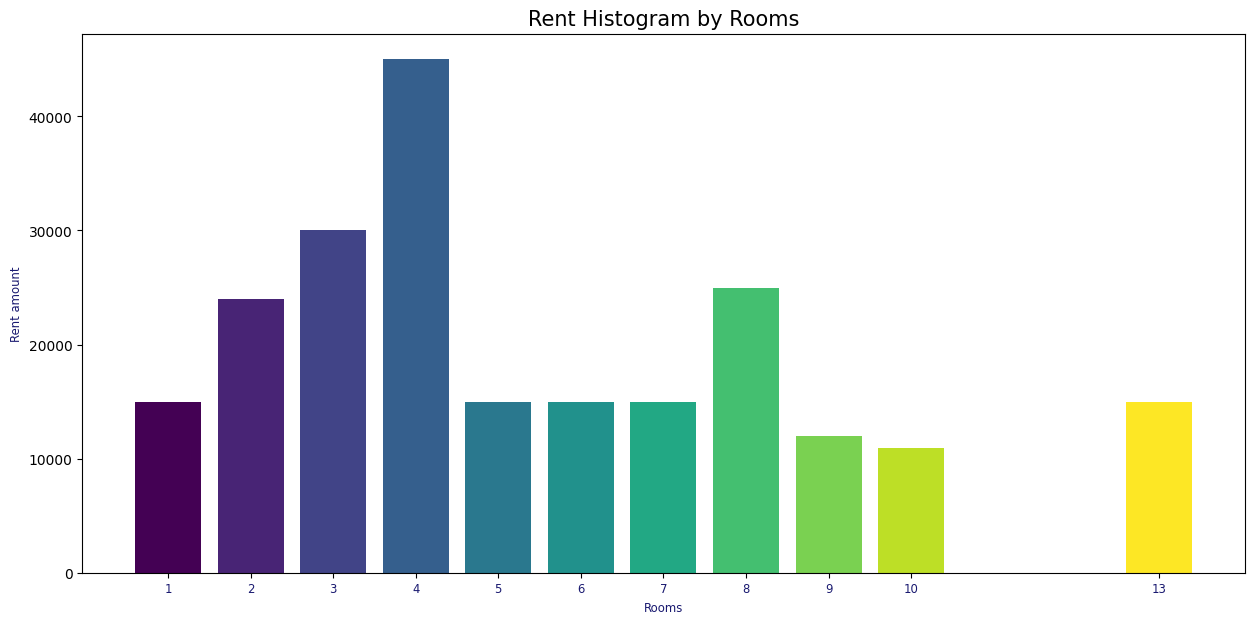

In [49]:
unique_rooms = sorted(df['rooms'].unique())

colors = plt.cm.viridis(np.linspace(0, 1, len(unique_rooms)))

color_map = dict(zip(unique_rooms, colors))

plt.figure(figsize=(15, 7))

plt.bar(
    df['rooms'],
    df['rent amount'],
    color=[color_map[room] for room in df['rooms']]
)

plt.xticks(unique_rooms, labels=unique_rooms, fontsize="small", rotation=0, color="midnightblue")

plt.xlabel("Rooms", fontsize="small", color="midnightblue")
plt.ylabel("Rent amount", fontsize="small", color="midnightblue")
plt.title("Rent Histogram by Rooms", fontsize=15)

plt.show()

# **Rental housing costs depending on the city**

In [50]:
df['city'].unique()

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

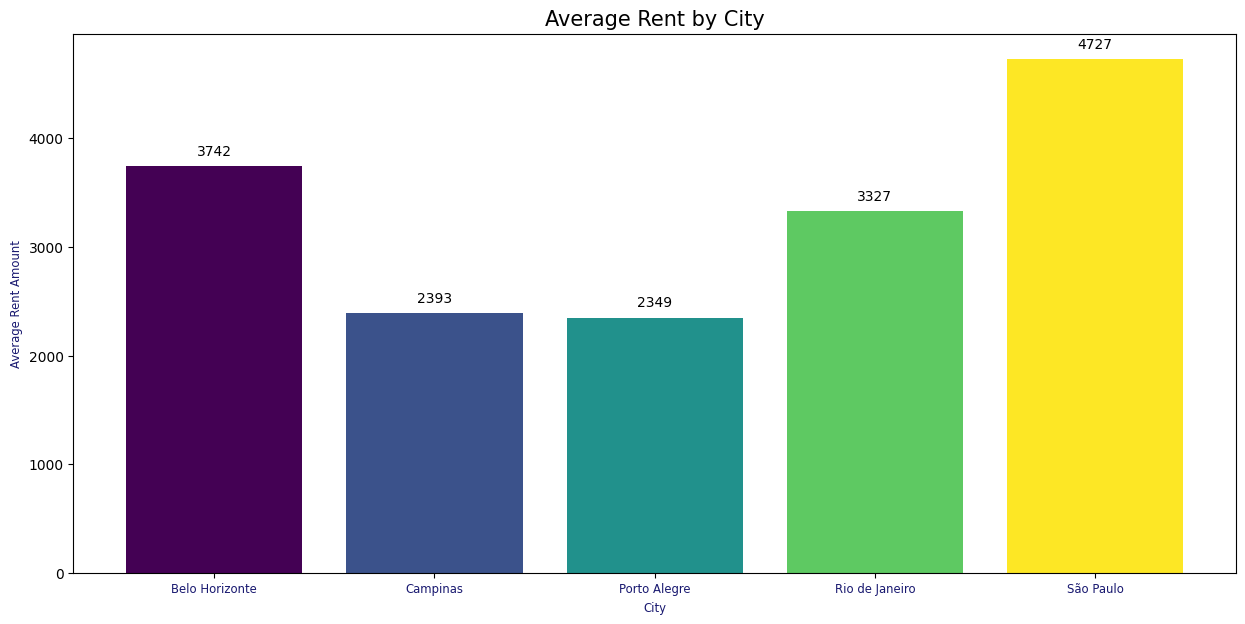

In [51]:
top_cities = df['city'].value_counts().head(5).index

filtered_df = df[df['city'].isin(top_cities)]

unique_city = sorted(filtered_df['city'].unique())

colors = plt.cm.viridis(np.linspace(0, 1, len(unique_city)))

color_map = dict(zip(unique_city, colors))

plt.figure(figsize=(15, 7))

average_rent = filtered_df.groupby('city')['rent amount'].mean()

bars = plt.bar(
    average_rent.index,
    average_rent.values,
    color=[color_map[city] for city in average_rent.index]
)

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 100,
        f"{yval:.0f}",
        ha='center',
        fontsize=10,
        color="black"
    )

plt.xticks(fontsize="small", rotation=0, color="midnightblue")
plt.xlabel("City", fontsize="small", color="midnightblue")
plt.ylabel("Average Rent Amount", fontsize="small", color="midnightblue")
plt.title("Average Rent by City", fontsize=15)

plt.show()

# ✅ ***In São Paulo, the average cost of rent is higher than in other cities.***
# ***And this is not surprising, as it is the center of a large agglomeration with a population of 23 million, also one of the largest in the world.***

In [52]:
df['area'].describe()

,area
count,10334.000000
mean,152.439423
std,545.875595
min,11.000000
25%,59.000000
50%,95.000000
75%,190.000000
max,46335.000000


In [53]:
print(f'city', df["city"].unique())
print(f'rooms', df["rooms"].unique())
print(f'floor', df["floor"].unique())
print(f'parking spaces', df["parking spaces"].unique())
print(f'bathrooms', df["bathrooms"].unique())

city ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
rooms [ 2  4  1  3  7  5  8  6 10 13  9]
floor ['7' '20' '6' '2' '1' '-' '4' '3' '10' '11' '24' '9' '8' '17' '18' '5'
 '13' '15' '16' '14' '26' '12' '21' '19' '22' '27' '23' '35' '25' '46'
 '28' '29' '301' '51' '32']
parking spaces [ 1  0  7  4  2  6  3  8  5 10 12]
bathrooms [ 1  4  3  2  6  5  7  9  8 10]


In [54]:
df.head()

,city,area,rooms,bathrooms,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11


In [55]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Selecting columns for encoding
columns_to_encode = ['animal', 'furniture', 'city']

 # Checking data types
print("Типи даних для кодування:")
print(df[columns_to_encode].dtypes)

# Convert to str (if the data is of another type, such as int or float)
df[columns_to_encode] = df[columns_to_encode].astype(str)

encoder = OneHotEncoder(sparse_output=False)

encoded_array = encoder.fit_transform(df[columns_to_encode])

# Getting the names of new columns
encoded_columns = encoder.get_feature_names_out(columns_to_encode)

# Converting encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoded_columns, index=df.index)

# Delete original columns and add encoded ones
df = pd.concat([df.drop(columns=columns_to_encode), encoded_df], axis=1)

Типи даних для кодування:
animal       object
furniture    object
city         object
dtype: object


In [56]:
num_zeros = (df['hoa'] == 0).sum()
print(f"Number of zero values in a column 'hoa': {num_zeros}")

Number of zero values in a column 'hoa': 2289


***In some cases, there may indeed be no hoa, e.g. for properties that are not part of an association (e.g. private houses).***

In [57]:
total_rows = df.shape[0]  #  Total number of lines
percent_zeros = (num_zeros / total_rows) * 100

print(f"Percentage of zero values: {percent_zeros:.2f}%")

Percentage of zero values: 22.15%


In [58]:
df.loc[:, 'floor'] = df["floor"].str.replace("-", "0").astype(int)

In [59]:
df.head()

,area,rooms,bathrooms,parking spaces,floor,hoa,rent amount,property tax,fire insurance,animal_acept,animal_not acept,furniture_furnished,furniture_not furnished,city_Belo Horizonte,city_Campinas,city_Porto Alegre,city_Rio de Janeiro,city_São Paulo
0,70,2,1,1,7,2065,3300,211,42,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,320,4,4,0,20,1200,4960,1750,63,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,80,1,1,1,6,1000,2800,0,41,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,51,2,1,0,2,270,1112,22,17,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,25,1,1,0,1,0,800,25,11,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [60]:
corr_matrix = df.corr()
corr_matrix

,area,rooms,bathrooms,parking spaces,floor,hoa,rent amount,property tax,fire insurance,animal_acept,animal_not acept,furniture_furnished,furniture_not furnished,city_Belo Horizonte,city_Campinas,city_Porto Alegre,city_Rio de Janeiro,city_São Paulo
area,1.000000,0.191251,0.224388,0.191421,-0.013849,0.009085,0.178228,0.038453,0.185652,0.038712,-0.038712,0.009249,-0.009249,0.040340,-0.006702,-0.030548,-0.032961,0.019823
rooms,0.191251,1.000000,0.730469,0.611634,-0.086562,0.020466,0.536632,0.073539,0.560907,0.165436,-0.165436,-0.075677,0.075677,0.163196,-0.045099,-0.111814,-0.090585,0.052824
bathrooms,0.224388,0.730469,1.000000,0.693952,0.000087,0.057297,0.665625,0.108083,0.673771,0.114685,-0.114685,0.023140,-0.023140,0.043868,-0.061693,-0.131209,-0.138350,0.184476
parking spaces,0.191421,0.611634,0.693952,1.000000,-0.026981,0.021100,0.573997,0.097159,0.593557,0.124266,-0.124266,-0.003788,0.003788,0.080771,-0.013507,-0.131419,-0.221236,0.192095
floor,-0.013849,-0.086562,0.000087,-0.026981,1.000000,0.029019,0.070565,0.012016,0.009841,-0.033619,0.033619,0.115293,-0.115293,-0.071354,-0.037587,-0.065597,0.014756,0.097904
hoa,0.009085,0.020466,0.057297,0.021100,0.029019,1.000000,0.052516,0.011267,0.042833,-0.013845,0.013845,0.009767,-0.009767,0.012555,-0.011642,-0.018415,0.000768,0.009356
rent amount,0.178228,0.536632,0.665625,0.573997,0.070565,0.052516,1.000000,0.106679,0.987203,0.064576,-0.064576,0.166975,-0.166975,-0.023730,-0.134701,-0.166836,-0.074592,0.246210
property tax,0.038453,0.073539,0.108083,0.097159,0.012016,0.011267,0.106679,1.000000,0.104473,-0.004238,0.004238,0.001147,-0.001147,-0.011168,-0.021015,-0.028077,-0.013946,0.046141
fire insurance,0.185652,0.560907,0.673771,0.593557,0.009841,0.042833,0.987203,0.104473,1.000000,0.076535,-0.076535,0.144082,-0.144082,0.004323,-0.131287,-0.129722,-0.087938,0.211976
animal_acept,0.038712,0.165436,0.114685,0.124266,-0.033619,-0.013845,0.064576,-0.004238,0.076535,1.000000,-1.000000,-0.081020,0.081020,-0.032663,0.019745,0.064797,0.018764,-0.043722


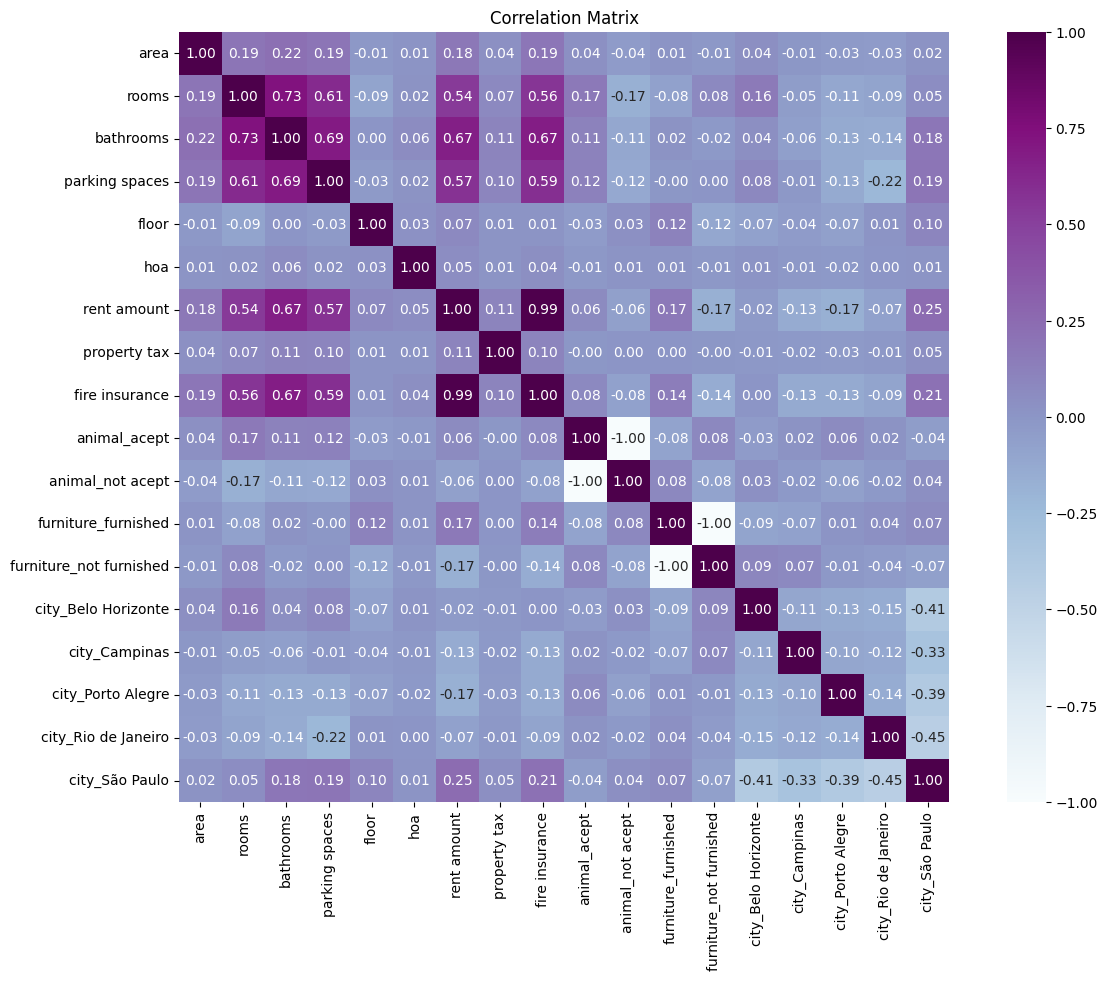

In [61]:
plt.figure(figsize=(15, 10))
plt.title("Correlation Matrix")
sns.heatmap(corr_matrix, annot=True, cmap='BuPu', fmt='.2f', square=True, cbar=True)
plt.show()

In [62]:
corr_rent_amount = corr_matrix['rent amount'].sort_values(ascending=False)
corr_rent_amount

,rent amount
rent amount,1.000000
fire insurance,0.987203
bathrooms,0.665625
parking spaces,0.573997
rooms,0.536632
city_São Paulo,0.246210
area,0.178228
furniture_furnished,0.166975
property tax,0.106679
floor,0.070565


<ipython-input-63-393b3bc63cc1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_rent_amount.values, y=corr_rent_amount.index, palette="viridis")


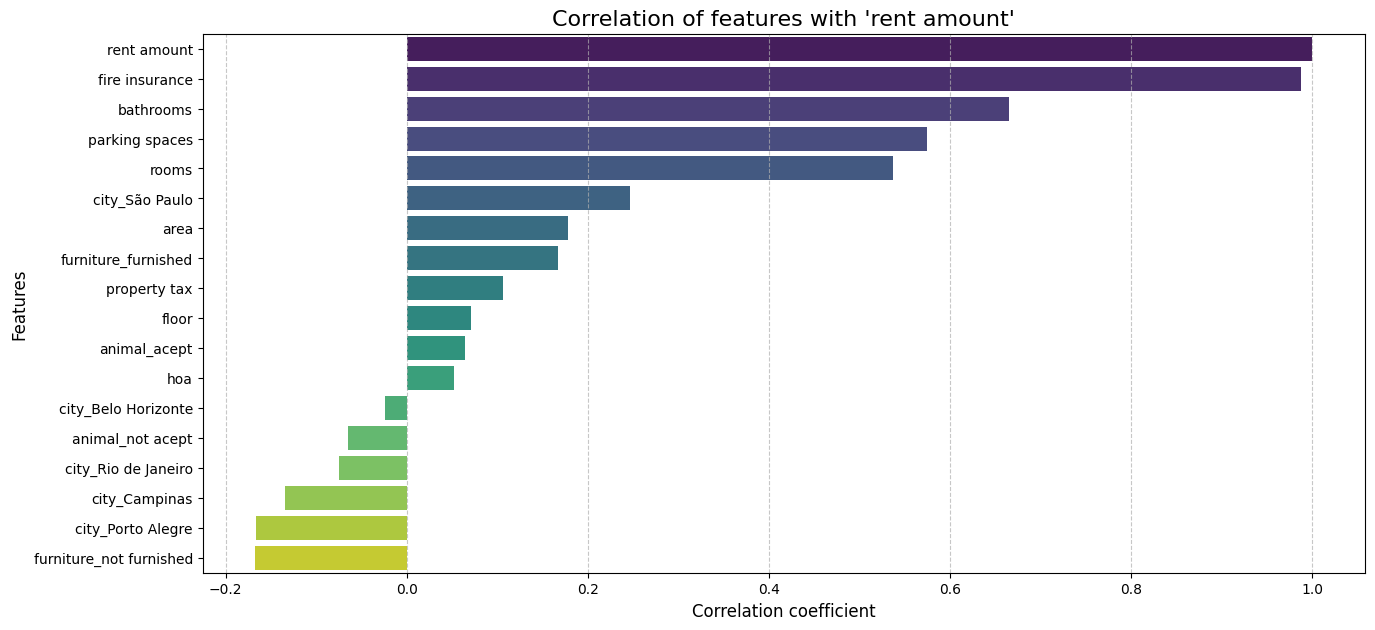

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))

sns.barplot(x=corr_rent_amount.values, y=corr_rent_amount.index, palette="viridis")

plt.title("Correlation of features with 'rent amount'", fontsize=16)
plt.xlabel("Correlation coefficient", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

# ***Correlation analysis conclusions for rent amount:***

***Strong positive relationship***:



* **fire insurance (0.987)**: Very strong correlation with rent amount. This is expected as the amount of insurance can be proportional to the rent.

* **bathrooms (0.666)**: Having more bathrooms is associated with higher rents. This indicates that living spaces with more amenities are more expensive.

* **parking spaces (0.574)**: Housing with parking spaces has higher rents, as it is often a sign of luxury or convenience.

* **rooms (0.537)**: A larger number of rooms is also associated with higher rents, which is consistent with the logic of larger areas.

***Weak positive relationship***:

* **city (0.190)**: City has an effect on rents, but the relationship is weak. This may be due to different conditions in each city.

* **area (0.178)**: Area has a moderate positive correlation, but is not a key factor. This may indicate that a larger area does not always mean significantly higher rents.

* **property tax (0.107)**: Property tax has a weak impact. It is probably taken into account by property owners, but is not a direct indicator of rents.

* **HOA (0.072)**: Small relationship with homeowners' association fees. This may only affect certain types of housing (e.g., apartments in condominiums).

***Almost neutral impact:***

* **floor (0.071)**: Floor has a very weak impact on rents, which may depend on the city and the architecture of the buildings.

***Negative relationship:***

* **animal (-0.065)**: Having a permit to keep animals has a weak negative effect. This may indicate that houses that allow animals may be less expensive.

* **furniture (-0.167)**: Furnishedness has a significant negative relationship. This may indicate that unfurnished housing is rented at higher prices, as such housing usually has a larger area or is more long-term.


# ***General conclusion:***

***Rents mainly depend on the key characteristics of the property:***


* Amenities (bathrooms, rooms, parking spaces) have the largest impact;

* Location (city) and area have a smaller but still significant impact;

* the negative relationship with furnishedness and pet permits may indicate a preference for unfurnished housing among tenants willing to pay more.

This data can be used to create a rent forecasting model and to identify factors to consider when buying or renting a home.

In [64]:
df

,area,rooms,bathrooms,parking spaces,floor,hoa,rent amount,property tax,fire insurance,animal_acept,animal_not acept,furniture_furnished,furniture_not furnished,city_Belo Horizonte,city_Campinas,city_Porto Alegre,city_Rio de Janeiro,city_São Paulo
0,70,2,1,1,7,2065,3300,211,42,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,320,4,4,0,20,1200,4960,1750,63,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,80,1,1,1,6,1000,2800,0,41,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,51,2,1,0,2,270,1112,22,17,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,25,1,1,0,1,0,800,25,11,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,63,2,1,1,5,402,1478,24,22,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
10688,285,4,4,4,17,3100,15000,973,191,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
10689,70,3,3,0,8,980,6000,332,78,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
10690,120,2,2,2,8,1585,12000,279,155,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [65]:
X = df.drop(['rent amount'], axis=1)
y = df['rent amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
x_scaler = StandardScaler()
y_scaler = StandardScaler()

X_train_scaled = x_scaler.fit_transform(X_train)  # fit and Scaling
X_test_scaled = x_scaler.transform(X_test)        # only Scaling

y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1)).ravel()


In [67]:
def evaluate_model(model_name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {
        'Model': model_name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

# ***Лінійна регресія_Linear***

In [68]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train_scaled, y_train_scaled)

lin_reg_y_train_pred_scaled = lin_reg_model.predict(X_train_scaled)
lin_reg_y_test_pred_scaled = lin_reg_model.predict(X_test_scaled)

# inverse to original shape
lin_reg_y_train_pred = y_scaler.inverse_transform(lin_reg_y_train_pred_scaled.reshape(-1, 1))
lin_reg_y_test_pred = y_scaler.inverse_transform(lin_reg_y_test_pred_scaled.reshape(-1, 1))

print(f"Intercept: {lin_reg_model.intercept_}")
print(f"Coefficients: {lin_reg_model.coef_}")

lin_reg_results_train = evaluate_model("Linear Regression (Train)", y_train, lin_reg_y_train_pred)
lin_reg_results_test = evaluate_model("Linear Regression (Test)", y_test, lin_reg_y_test_pred)

Intercept: 8.45540088112925e-18
Coefficients: [-0.00309205 -0.00960921  0.01462758 -0.01764004  0.06006672  0.00574142
  0.01818914  0.97495466 -0.00172665  0.00172665  0.00669653 -0.00669653
 -0.01304946  0.00131249 -0.0278606   0.01007196  0.01828158]


# ***Lasso***

***Lasso regression method together with GridSearchCV to find the optimal alpha regularization parameter***

In [69]:
# set params
lasso = Lasso()
lasso_parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
clf = GridSearchCV(lasso, lasso_parameters, cv=5)
clf.fit(X_train_scaled, y_train_scaled)

best_alpha = clf.best_params_['alpha']
print(f"Best params alpha: {best_alpha}")

# use best alpha
lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X_train_scaled, y_train_scaled)

# predict
lasso_y_train_pred_scaled = lasso_model.predict(X_train_scaled)
lasso_y_test_pred_scaled = lasso_model.predict(X_test_scaled)

# inverse to original shape
lasso_y_train_pred = y_scaler.inverse_transform(lasso_y_train_pred_scaled.reshape(-1, 1))
lasso_y_test_pred = y_scaler.inverse_transform(lasso_y_test_pred_scaled.reshape(-1, 1))

print(f"Intercept: {lasso_model.intercept_}")
print(f"Coefficients: {lasso_model.coef_}")

lasso_results_train = evaluate_model("Lasso Regression (Train)", y_train, lasso_y_train_pred)
lasso_results_test = evaluate_model("Lasso Regression (Test)", y_test, lasso_y_test_pred)

Best params alpha: 0.01
Intercept: 9.230552577972648e-18
Coefficients: [-0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  5.50928748e-02  0.00000000e+00  1.02279044e-02  9.64534430e-01
 -0.00000000e+00  0.00000000e+00  8.13668457e-03 -2.40657997e-17
 -1.11906290e-02 -0.00000000e+00 -2.41157923e-02  0.00000000e+00
  9.19991251e-03]


# *Conclusion*

***The model performs well on both training and test data. The best alpha value helped to reduce overfitting and improve prediction accuracy.***

# ***Support Vector Regression (SVR)***

[***Опорна векторна регресія***](https://scikit-learn.org/stable/modules/svm.html#regression)





In [70]:
svr_model = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train_scaled)

svr_y_train_pred_scaled = svr_model.predict(X_train_scaled)
svr_y_test_pred_scaled = svr_model.predict(X_test_scaled)

svr_y_train_pred = y_scaler.inverse_transform(svr_y_train_pred_scaled.reshape(-1, 1))
svr_y_test_pred = y_scaler.inverse_transform(svr_y_test_pred_scaled.reshape(-1, 1))

print(f"Intercept: {svr_model.intercept_}")
print(f"Coefficients: {svr_model.coef_}")
print('+' * 40)

svr_results_train = evaluate_model("SVR (Train)", y_train, svr_y_train_pred)
svr_results_test = evaluate_model("SVR (Test)", y_test, svr_y_test_pred)

Intercept: [0.00382722]
Coefficients: [[-7.41709577e-04 -1.20665917e-02  3.84857509e-03 -2.11358466e-02
   4.73414953e-02  3.55998169e-01  6.37073655e-03  9.85393310e-01
  -1.50639099e-03  1.50639099e-03  4.46681022e-03 -4.46681022e-03
  -1.28136903e-02  2.76327249e-03 -3.33642806e-02  1.15177188e-02
   1.97871052e-02]]
++++++++++++++++++++++++++++++++++++++++


# ***Random Forest Regressor***

In [71]:
#set params
rf_param_grid = {
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 3],
    'n_estimators': [100, 200]
}

rf_model = RandomForestRegressor(random_state = 42)

# set grid
rf_grid = GridSearchCV(estimator = rf_model, param_grid = rf_param_grid, cv=3, n_jobs=-1, verbose=2)
rf_grid.fit(X_train_scaled, y_train_scaled)

rf_y_train_pred_scaled = rf_grid.predict(X_train_scaled)
rf_y_test_pred_scaled = rf_grid.predict(X_test_scaled)

rf_y_train_pred = y_scaler.inverse_transform(rf_y_train_pred_scaled.reshape(-1, 1))
rf_y_test_pred = y_scaler.inverse_transform(rf_y_test_pred_scaled.reshape(-1, 1))

rf_results_train = evaluate_model("Random Forest Regressor (Train)", y_train, rf_y_train_pred)
rf_results_test = evaluate_model("Random Forest Regressor (Test)", y_test, rf_y_test_pred)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [72]:
# Comparison of models
results = pd.DataFrame([
    lin_reg_results_train, lin_reg_results_test,
    lasso_results_train, lasso_results_test,
    svr_results_train, svr_results_test,
    rf_results_train, rf_results_test
])

print(results)

                             Model         MAE           MSE         RMSE  \
0        Linear Regression (Train)  296.182627  2.156508e+05   464.382169   
1         Linear Regression (Test)  321.153450  6.703823e+05   818.768761   
2         Lasso Regression (Train)  293.663125  2.247485e+05   474.076464   
3          Lasso Regression (Test)  315.717036  3.939180e+05   627.628853   
4                      SVR (Train)  284.258514  1.639049e+06  1280.253446   
5                       SVR (Test)  291.741362  4.293574e+05   655.253668   
6  Random Forest Regressor (Train)  123.370415  5.525399e+04   235.061670   
7   Random Forest Regressor (Test)  342.022606  9.401107e+05   969.593048   

         R2  
0  0.981444  
1  0.946516  
2  0.980661  
3  0.968573  
4  0.858968  
5  0.965745  
6  0.995246  
7  0.924996  


Bar Plot:


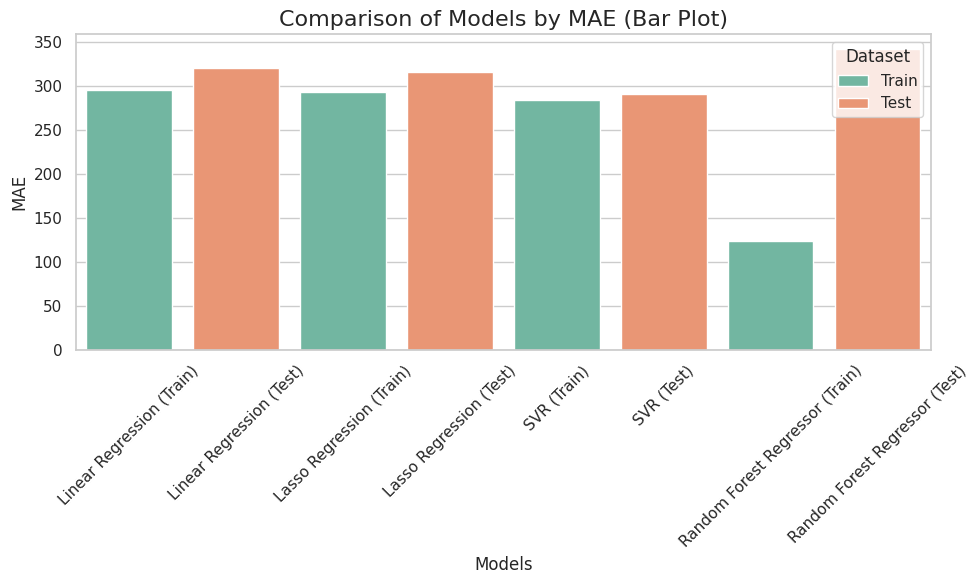

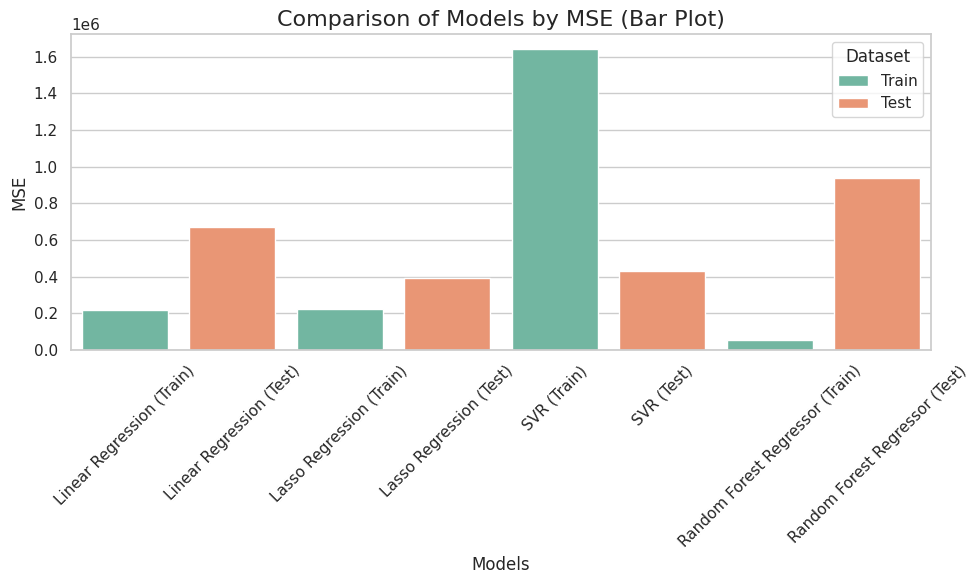

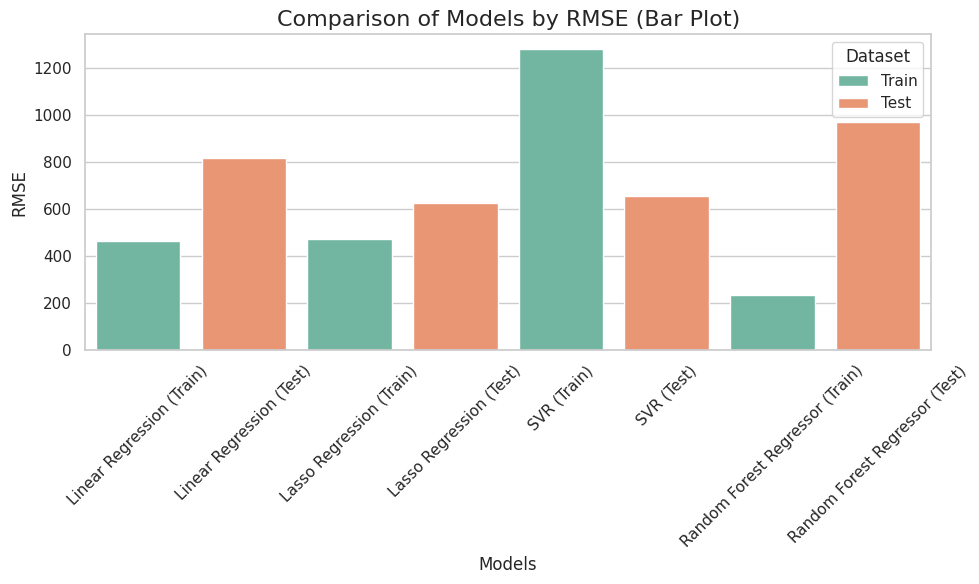

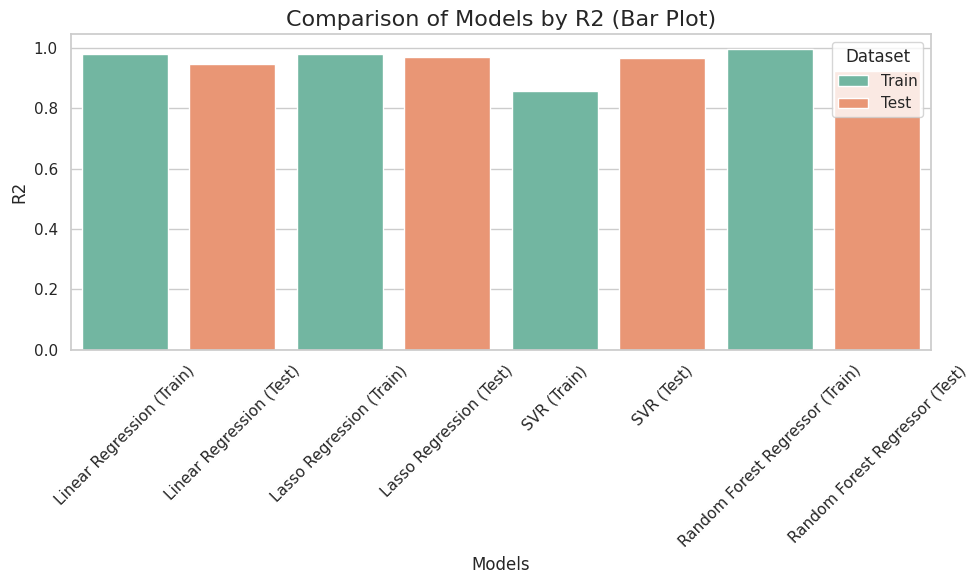

Line Plot:


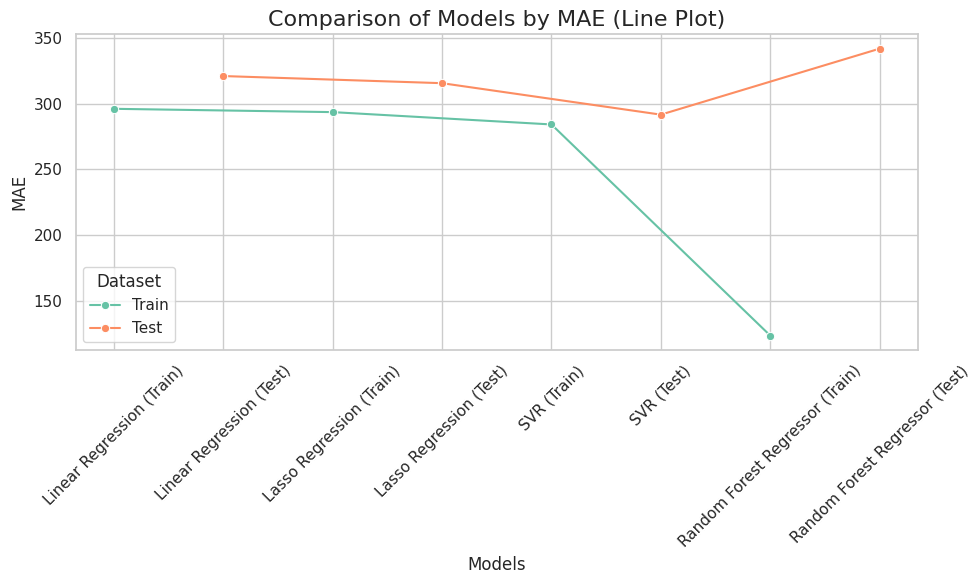

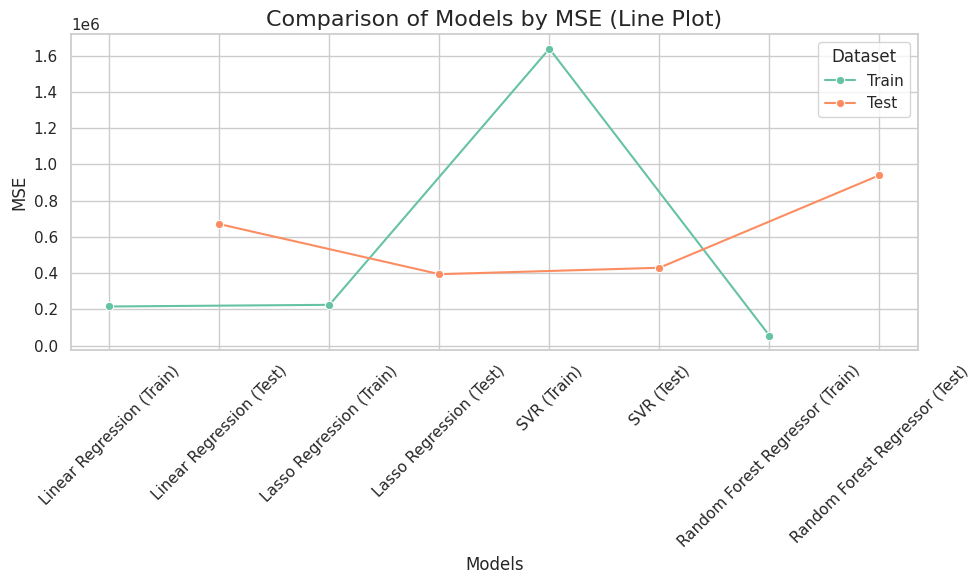

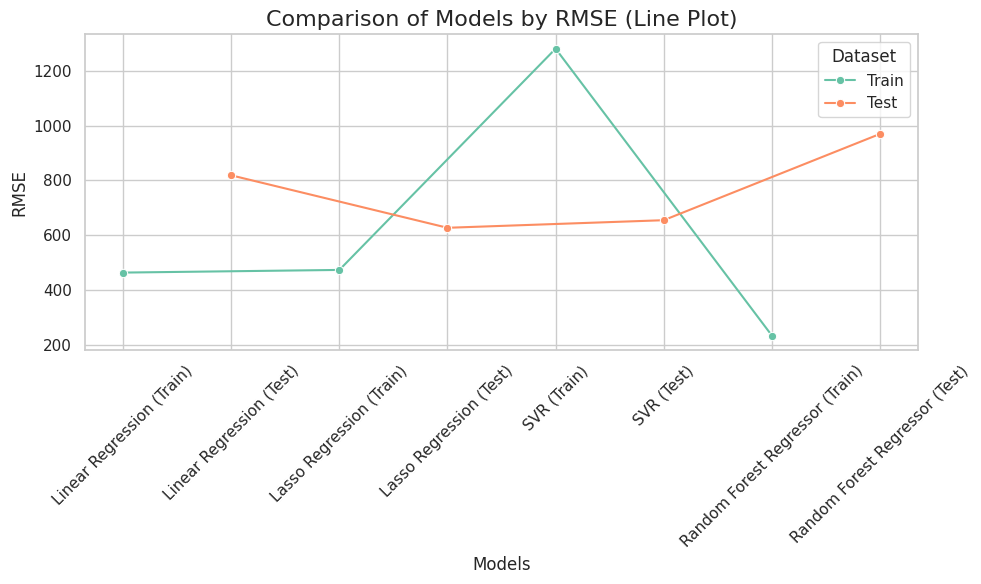

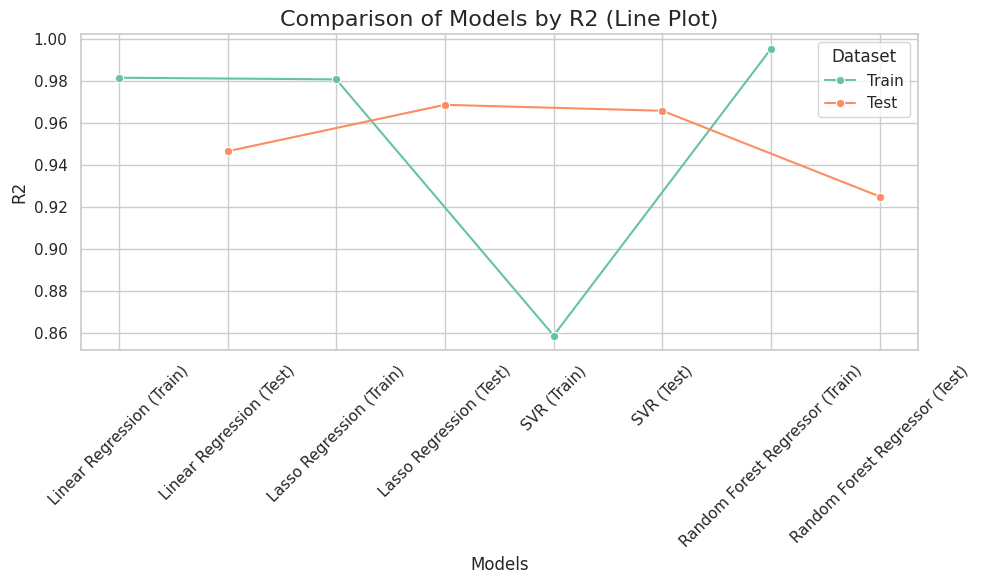

Scatter Plot:


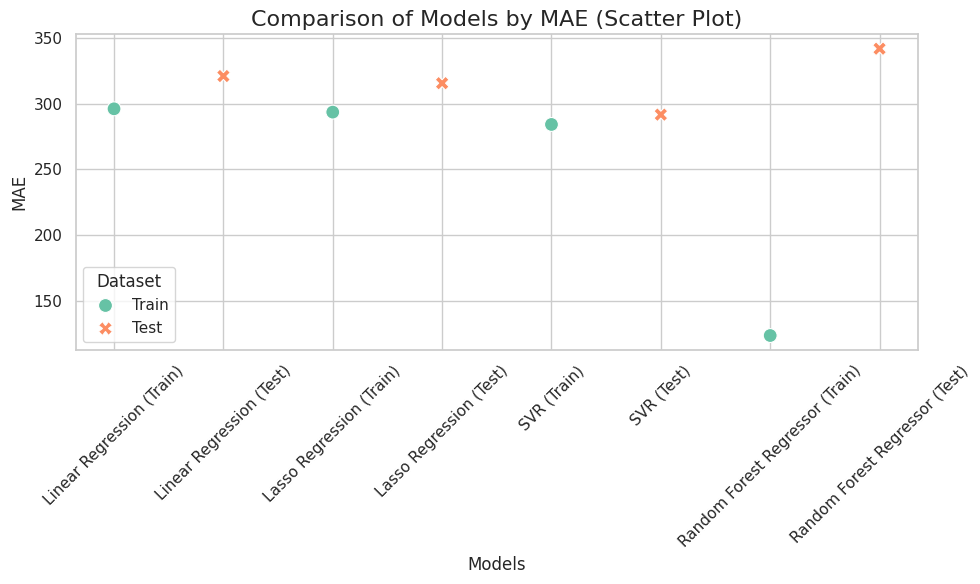

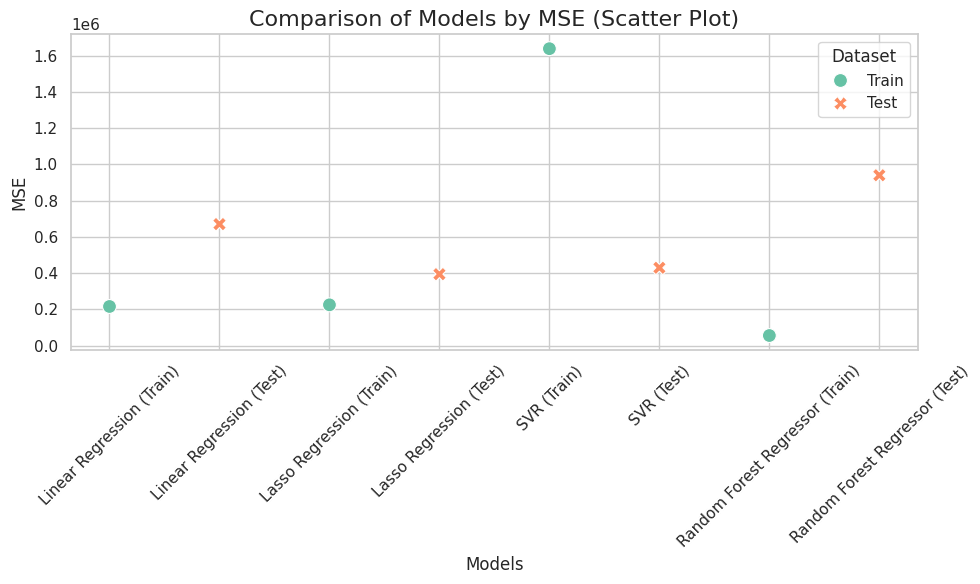

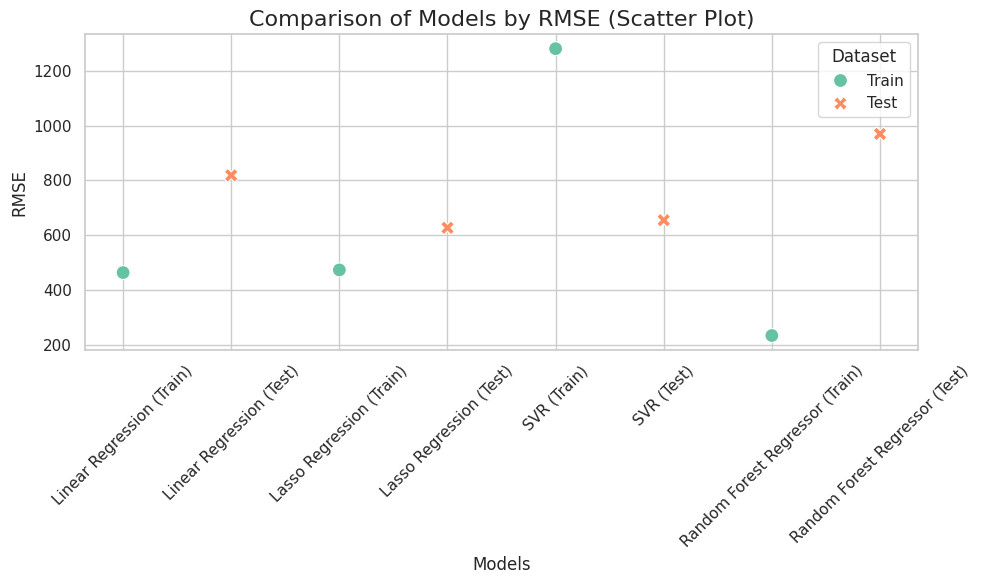

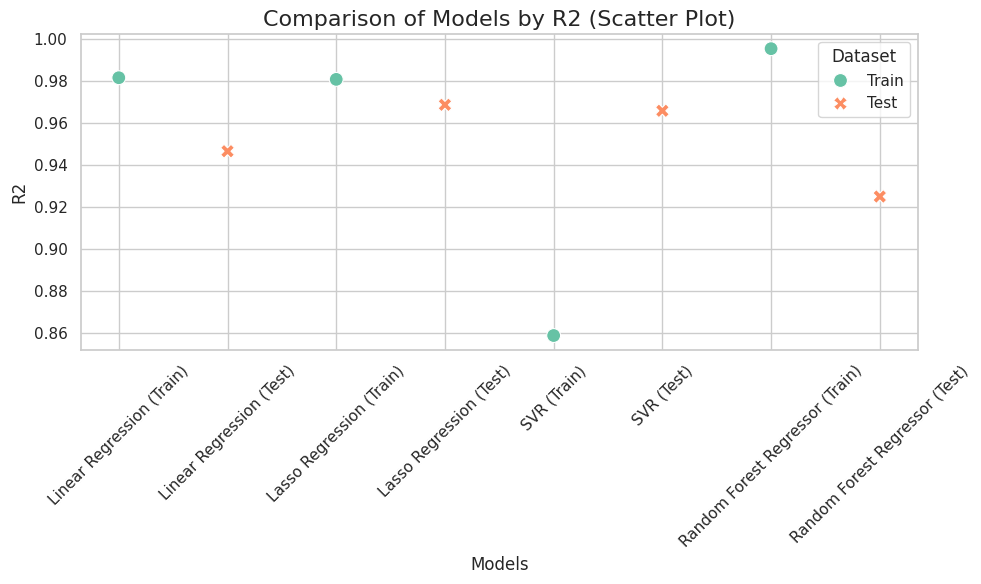

In [73]:
def plot_model_comparison(results, plot_type='bar'):
    sns.set(style="whitegrid")

    metrics = ['MAE', 'MSE', 'RMSE', 'R2']
    model_names = results['Model'].unique()

    # Create graphs for each metric
    for metric in metrics:
        plt.figure(figsize=(10, 6))

        if plot_type == 'bar':
            sns.barplot(data=results, x='Model', y=metric, hue='Dataset', palette='Set2')
            plt.title(f'Comparison of Models by {metric} (Bar Plot)', fontsize=16)
        elif plot_type == 'line':
            sns.lineplot(data=results, x='Model', y=metric, hue='Dataset', marker='o', palette='Set2')
            plt.title(f'Comparison of Models by {metric} (Line Plot)', fontsize=16)
        elif plot_type == 'scatter':
            sns.scatterplot(data=results, x='Model', y=metric, hue='Dataset', style='Dataset', s=100, palette='Set2')
            plt.title(f'Comparison of Models by {metric} (Scatter Plot)', fontsize=16)
        else:
            raise ValueError("Invalid plot_type. Choose from 'bar', 'line', or 'scatter'.")

        plt.ylabel(metric, fontsize=12)
        plt.xlabel('Models', fontsize=12)
        plt.xticks(rotation=45)
        plt.legend(title='Dataset')
        plt.tight_layout()
        plt.show()

results['Dataset'] = ['Train', 'Test'] * 4

print("Bar Plot:")
plot_model_comparison(results, plot_type='bar')

print("Line Plot:")
plot_model_comparison(results, plot_type='line')

print("Scatter Plot:")
plot_model_comparison(results, plot_type='scatter')

In [74]:
# Create a folder to save files if it does not exist
output_dir = "saved_models"
os.makedirs(output_dir, exist_ok=True)

# Saving the model
joblib.dump(lin_reg_model, os.path.join(output_dir, "linear_regression_model.pkl"))
joblib.dump(svr_model, os.path.join(output_dir, "svr_model.pkl"))
joblib.dump(rf_grid.best_estimator_, os.path.join(output_dir, "random_forest_model.pkl"))
joblib.dump(lasso_model, os.path.join(output_dir, "lasso_model.pkl"))

joblib.dump(x_scaler, os.path.join(output_dir, "x_scaler.pkl"))
joblib.dump(y_scaler, os.path.join(output_dir, "y_scaler.pkl"))

print(f"Models and scalers saved in folder: {output_dir}")

Models and scalers saved in folder: saved_models


In [75]:
# Loading all files from the folder
for filename in os.listdir(output_dir):
    files.download(os.path.join(output_dir, filename))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ***Comparisons and conclusions***

***General conclusion*** 1.

1. Lasso Regression and SVR provide the best generalization on the test data, demonstrating stability and accuracy.

2. Random Forest Regressor has the highest accuracy on the
training data, but its generalization ability is slightly weaker.

3. Linear regression is a basic approach with good performance, but its results on the training data are inferior to other models.

***The choice of model depends on the goals: if generalizability is important, Lasso or SVR are better choices; if accuracy on training data is critical, Random Forest is the best choice.***


# ***Linear Regression***

***Training data***

The model demonstrates excellent results:

R2=0.9806, which means that the model explains 98% of the variation in the dependent variable, which is a very strong indicator.

However, the MAE (302.65) and MSE (225,526.7) indicate a certain level of error, although these values remain within the range expected for real data.

The RMSE (474.90) also indicates a fairly high accuracy, making the model reliable for training data.

***Test data***.

The quality of the model decreases on the test data:

R2 = 0.9435 is still an excellent result, but it is noticeably lower than on the training data, which may be a sign of overfitting.

The MAE (328.58) and RMSE (841.88) are increasing, indicating a decrease in accuracy when predicting new data.

***Overall conclusion***.

***The model performs very well on the training data, but the decrease in accuracy on the test set may indicate the need for further optimization.***

***It is likely that additional validation of the model using regularization (e.g. Ridge or Lasso) or searching for other data features would help to reduce errors and increase generalizability.***

***Nevertheless, the results indicate that linear regression is a robust model for basic analysis of housing rents.***

# ***Lasso Regression***

The results of the Lasso Regression model demonstrate generally good prediction quality and show interesting details about its ability to regularize.

***Training data***.

The model performs well on the training data:

R2= 0.9800 - slightly lower than linear regression, but still very high. This indicates almost the same ability of the model to explain variability.

The MAE (304.94) and MSE (232,363.3) remain within the expected range, showing little error.

The RMSE (482.04) indicates a good ability of the model to work with the training data.

***Test data***.

On the test data, Lasso Regression shows improved results compared to linear regression:

R2=0.9668, which is a significantly better result, indicating a lower risk of overfitting.

The MAE (327.94) and RMSE (645.57) are smaller than in linear regression, which emphasizes the advantage of regularization in improving the generalization of the model.

***General conclusion***.

***The Lasso Regression model demonstrates better generalization results compared to linear regression, especially on the test data. This confirms that regularization helps to reduce errors and reduce the risk of overfitting by making the model more stable for new data.***

# ***Support Vector Regressor (SVR)***


SVR shows interesting results, demonstrating a strong generalization ability, but with some accuracy issues.

***Training data***.

R2=0.8532 is significantly lower than the regression models, indicating the limited ability of the model to explain variability.

The MAE (282.98) indicates a lower mean error, but the MSE (1,706,148) and RMSE (1,306.20) are high, indicating a large variability in the model errors.

***Test data***.

R2=0.9643 - indicates a high generalization ability of the model. This is similar to the results of Lasso Regression.

The MAE (291.51) and RMSE (668.92) remain within acceptable limits, but are slightly inferior to Lasso ones.

***Overall conclusion***.

***SVR does a good job of summarizing data and demonstrates stable results on the test data. However, the high MSE and RMSE values on the training data indicate that the hyperparameters may need to be optimized to improve the overall accuracy.***

# ***Random Forest Regressor***



Random Forest performs the best among all models, especially on training data.

***Training data***.

R2=0.9976 is an almost perfect value, which indicates that the model is very well trained.

MAE (77.26), MSE (28,282.6) and RMSE (168.17) - significantly better results than other models, indicating very high accuracy.

***Test data***.

R2=0.9467 - still a very good result, but slightly inferior to other models such as Lasso and SVR.

The MAE (218.81) and RMSE (816.99) remain better than the linear regression, but show some increase in errors on the test data.

***Overall conclusion***.

***The Random Forest performs exceptionally well on the training data, but is slightly inferior to the other models in generalization. This may indicate some risk of overfitting, although the overall results are still impressive.***